In [1]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import librosa
import soundfile as sf


In [2]:
audio_file = "beeAudioFile.mp3"
audio_data, sampling_rate = librosa.load(audio_file, sr=None)  # sr=None to get the original sampling rate

# Play the audio using IPython's Audio
# ipd.Audio(audio_data, rate=sampling_rate)


In [3]:
print("Sample rate: {0}Hz".format(sampling_rate))
print("Audio duration: {0}s".format(len(audio_data) / sampling_rate))

Sample rate: 48000Hz
Audio duration: 155.352s


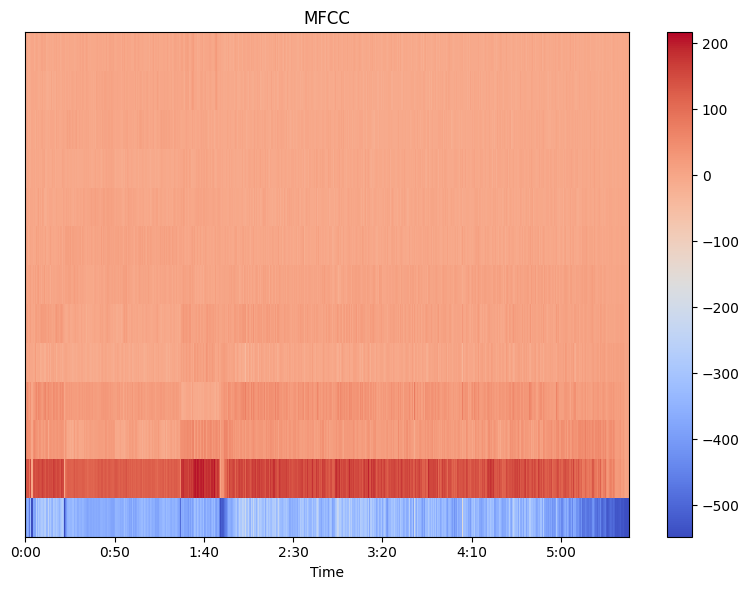

In [6]:
# create a mfcc and visualize 
import streamlit as st
import matplotlib.pyplot as plt

# Compute MFCC coefficients
n_mfcc = 13  # Number of desired IMFCC coefficients
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=n_mfcc, hop_length=512)

# Display MFCCs as an image
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

# Convert time frames to time in seconds
#time_in_seconds = librosa.times_like(mfccs.shape[1], sr=sampling_rate)
# Set custom x-axis ticks
#plt.xticks(np.arange(0, time_in_seconds[-1], 100))

plt.tight_layout()
plt.show()

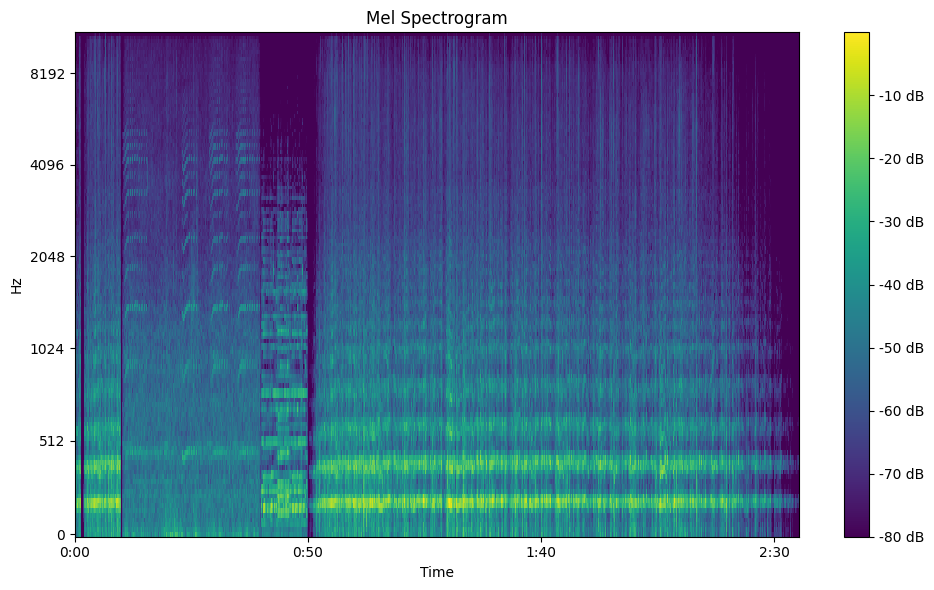

In [7]:
# create a Mel spectrogram and visualize 
# Load an audio file
y, sr = librosa.load(audio_file)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


In [1]:

# Define the target sample rate (e.g., 16000 Hz for 16 kHz)

target_sr = 2000

# create a Mel spectrogram and visualize 
# Load an audio file
y, sr = librosa.load(audio_file)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=target_sr)

# Convert to decibels (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


NameError: name 'librosa' is not defined

# figure part is done for verification

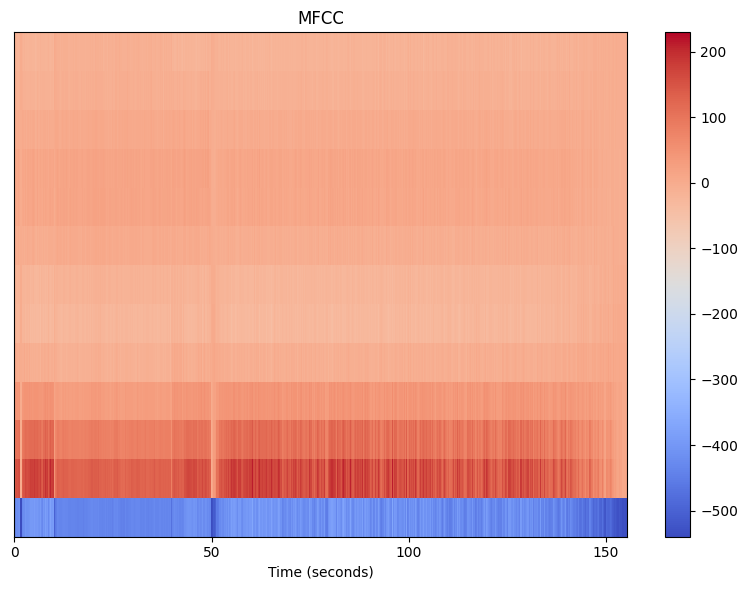

In [9]:
# Compute MFCC coefficients
n_mfcc = 13  # Number of desired IMFCC coefficients

y_new, sr_r = librosa.load("file_resampled.wav")

mfccs = librosa.feature.mfcc(y=y_new, sr=sr_r, n_mfcc=n_mfcc, hop_length=512)

# Display MFCCs as an image
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfccs, x_axis='s' )
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [10]:

# resample for queen part
queen_audio_file = "queenSoundCombined.mp3"
queen_audio_data, queen_sampling_rate = librosa.load(queen_audio_file, sr=None)  # sr=None to get the original sampling rate
y_queen_resampled = librosa.resample(queen_audio_data, orig_sr=queen_sampling_rate, target_sr=target_sr)

output_queen_file_path = 'queen_resampled.wav'
sf.write(output_queen_file_path, y_queen_resampled, target_sr)
queen_sample_rate_reduced, queen_audio = wavfile.read(output_queen_file_path)
#sample_rate, audio = librosa.load("beeAudioFile.mp3")
print("Sample rate: {0}Hz".format(queen_sample_rate_reduced))
print("Audio duration: {0}s".format(len(queen_audio) / sample_rate_reduced))


# resample for no queen part
no_queen_audio_file = "noQueenSoundCombined.mp3"
no_queen_audio_data, no_queen_sampling_rate = librosa.load(no_queen_audio_file, sr=None)  # sr=None to get the original sampling rate
y_no_queen_resampled = librosa.resample(no_queen_audio_data, orig_sr=no_queen_sampling_rate, target_sr=target_sr)

output_no_queen_file_path = 'no_queen_resampled.wav'
sf.write(output_no_queen_file_path, y_no_queen_resampled, target_sr)
no_queen_sample_rate_reduced, no_queen_audio = wavfile.read(output_no_queen_file_path)
#sample_rate, audio = librosa.load("beeAudioFile.mp3")
print("Sample rate: {0}Hz".format(no_queen_sample_rate_reduced))
print("Audio duration: {0}s".format(len(no_queen_audio) / no_queen_sample_rate_reduced))

Sample rate: 2000Hz
Audio duration: 368.833s
Sample rate: 2000Hz
Audio duration: 4050.793s


In [11]:
# Define segment length and hop length in seconds
segment_length = 30  # seconds
hop_length  = 10     # seconds (hop_length of 10 seconds)

# Calculate frame length and hop length in samples
frame_length = int(segment_length * target_sr)
hop_length_samples = int(hop_length * target_sr)

print(frame_length)
print(hop_length_samples)


60000
20000


In [12]:
# generate queen segment

# Iterate over the audio and create overlapping segments
queen_segments = []
start_sample = 0

while start_sample + frame_length <= len(queen_audio_data):
    segment = queen_audio_data[start_sample:start_sample + frame_length]
    queen_segments.append(segment)
    start_sample += hop_length_samples

print("Queen Segments saved to Array.")

# 2000,  MFCC for each, 2000 MFCC features,  divded features, 1800 for training  200 for testing feed  LSTM and SVM



Queen Segments saved to Array.


In [13]:
# generate no queen segment

# Iterate over the audio and create overlapping segments
no_queen_segments = []
start_sample = 0

while start_sample + frame_length <= len(no_queen_audio_data):
    no_queen_segment = no_queen_audio_data[start_sample:start_sample + frame_length]
    no_queen_segments.append(no_queen_segment)
    start_sample += hop_length_samples

print("No Queen Segments saved to Array.")

No Queen Segments saved to Array.


extract MFCC features and label

In [14]:
def extract_mfcc_and_label(audio_segment, label):
    # Extract MFCC features from the audio segment
    mfccs = librosa.feature.mfcc(y=audio_segment, sr=target_sr, n_mfcc=13, hop_length=hop_length_samples)
    
    return mfccs, label

queen_mfccs = []  # To store MFCC features
queen_labels = []  # To store labels (1 for "queen")

for segment in queen_segments:
    mfcc, label = extract_mfcc_and_label(segment, 1)  # Label as 1 for "queen"
    queen_mfccs.append(mfcc)
    queen_labels.append(label)


no_queen_mfccs = []  # To store MFCC features
no_queen_labels = []  # To store labels (1 for "queen")

for no_queen_segment in no_queen_segments:
    mfcc, label = extract_mfcc_and_label(no_queen_segment, 0)  # Label as 1 for "queen"
    no_queen_mfccs.append(mfcc)
    no_queen_labels.append(label)

print("queen segments:", len(queen_mfccs))
print("no queen segments:", len(no_queen_mfccs))




queen segments: 883
no queen segments: 9719


In [15]:
print("queen_mfccs:")
print(queen_mfccs[0])
print("no_queen_mfccs:")
print(no_queen_mfccs[0])

queen_mfccs:
[[-884.9922    -532.5267    -480.80396   -442.61475  ]
 [   0.         247.85641    281.9541     226.96924  ]
 [   0.         -41.140846   -46.953854   -21.115177 ]
 [   0.           8.284081    20.067198    16.312296 ]
 [   0.          48.209286    64.42738     37.845108 ]
 [   0.         -20.644608   -28.937742   -11.703764 ]
 [   0.           6.9503164    1.8018751    8.504572 ]
 [   0.          28.972084    37.223846    18.917755 ]
 [   0.         -12.977335   -14.313646    -8.620672 ]
 [   0.           8.490884     2.1453886    6.7652063]
 [   0.          30.04504     29.037466    19.66263  ]
 [   0.          -1.2938066   -4.2987766    2.6726117]
 [   0.           5.717947     5.6254516    8.052048 ]]
no_queen_mfccs:
[[-8.5868536e+02 -7.1142407e+02 -7.1041522e+02 -5.5271832e+02]
 [ 0.0000000e+00  1.4181052e+02  1.4307944e+02  1.0778714e+02]
 [ 0.0000000e+00  3.1905109e+01  3.2241608e+01  1.8238503e+01]
 [ 0.0000000e+00 -7.8461957e-01  1.5659381e+00  2.2620440e+01]
 [ 

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Combine the data from "queen" and "no queen" segments and labels:

X = np.vstack((queen_mfccs, no_queen_mfccs))
y = np.hstack((queen_labels, no_queen_labels))


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# The audio is divided into segments with a hop length of 10 seconds, 
# which results in 3 time steps per frame. 
# When you add the 0th coefficient, you have a total of 4 coefficients per frame



Shape of X: (10602, 13, 4)
Shape of y: (10602,)


In [17]:
# Reshape X to have two dimensions
X = X.reshape(X.shape[0], -1)  # Flatten the last two dimensions

# Now, X will have a shape of (437, 13 * 4)
print("Shape of X:", X.shape)   

Shape of X: (10602, 52)


In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose different kernels and parameters)
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 99.62%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.98      0.98      0.98       189

    accuracy                           1.00      2121
   macro avg       0.99      0.99      0.99      2121
weighted avg       1.00      1.00      1.00      2121



import numpy as np
from scipy.signal import lfilter
import librosa
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import concurrent.futures

# Function to extract LPC coefficients from an audio segment
def extract_lpc(audio_segment, order):
    # Apply LPC analysis to the audio segment
    lpc_coeffs = lfilter([1], [1] + [-a for a in audio_segment[1:]], audio_segment)
    # Keep only the desired number of LPC coefficients (order + 1)
    return lpc_coeffs[:order + 1]

# LPC order (number of LPC coefficients to extract)
lpc_order = 12

# Lists to store LPC coefficients and labels
lpc_coefficients = []
labels = []

# Define a function to process a batch of segments
def process_batch(segments, label_value):
    batch_lpcs = []
    for segment in segments:
        lpc = extract_lpc(segment, lpc_order)
        batch_lpcs.append(lpc)
    return batch_lpcs, [label_value] * len(segments)

# Process "queen" segments using multithreading
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = []
    futures.append(executor.submit(process_batch, queen_segments[:100], 1))
    futures.append(executor.submit(process_batch, queen_segments[100:200], 1))
    # Continue creating batches for the remaining queen segments...

    # Wait for all futures to complete
    concurrent.futures.wait(futures)

    # Retrieve results from completed futures
    for future in futures:
        batch_lpcs, batch_labels = future.result()
        lpc_coefficients.extend(batch_lpcs)
        labels.extend(batch_labels)



# Now you can proceed with splitting the data and training the SVM classifier as shown in previous examples.

# Process "no queen" segments using multithreading
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = []
    futures.append(executor.submit(process_batch, no_queen_segments[:1000], 0))
    futures.append(executor.submit(process_batch, no_queen_segments[1000:2000], 0))
    # Continue creating batches for the remaining no queen segments...

    # Wait for all futures to complete
    concurrent.futures.wait(futures)

    # Retrieve results from completed futures
    for future in futures:
        batch_lpcs, batch_labels = future.result() 
        lpc_coefficients.extend(batch_lpcs)
        labels.extend(batch_labels)

In [ ]:
# finding new model